## Determination of intensity vs height relation
The reflectivity of $l$ successive layers is given by
$$R_l = r_{01} + \sum_{i=1}^l \left[\prod_{s=1}^i (1-r^2_{s-1,s}) \exp{(-ik\Delta_s)}\right] r_{i, i+1}$$
Such that:
$$r_{ij} = \frac{n_i - n_j}{n_i + n_j} \ , \ k = \frac{2 \pi}{\lambda} \ , \ \Delta_i = 2 n_i d_i$$
Where $n_i$ and $di$ are refractive index and the thickness of the layer $i$ respectively, and $\lambda$ is the wave length of the incident light.
Intensity observed from $l$ layers is given by 
$$I(x,y) = R_l^* R_l I_0$$
The intensity is calculated for the each value of height $h$ as from 0 to 200 nm, normalized with respect to the background and plotted against $h$
$$I_{norm}(h) = y_0 - A \cos{\left(\frac{4 \pi n_{out}}{\lambda} (h - h_0) + \phi \right)}$$
Where $y_0$ , $A$ and $h_0$ are fitting parameters and $\phi$ is the phase shift.\\
Inverting the last, we get $h$ as a function of $I_{norm}$ and the parameters determined from the fitting
$$h = \frac{\lambda}{4 \pi n_{out}} \left[\arccos{\left(\frac{y_0 - I_{norm}}{A} \right)} - \phi \right] + h_0$$
Applying this on the normalized image gives the height image.

### Libraries and Modules

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Modules
from RICM_model import RICM
from Utilities import Fit_Gaussian

### Read the whole RICM image and determine the base line from its histogram begining

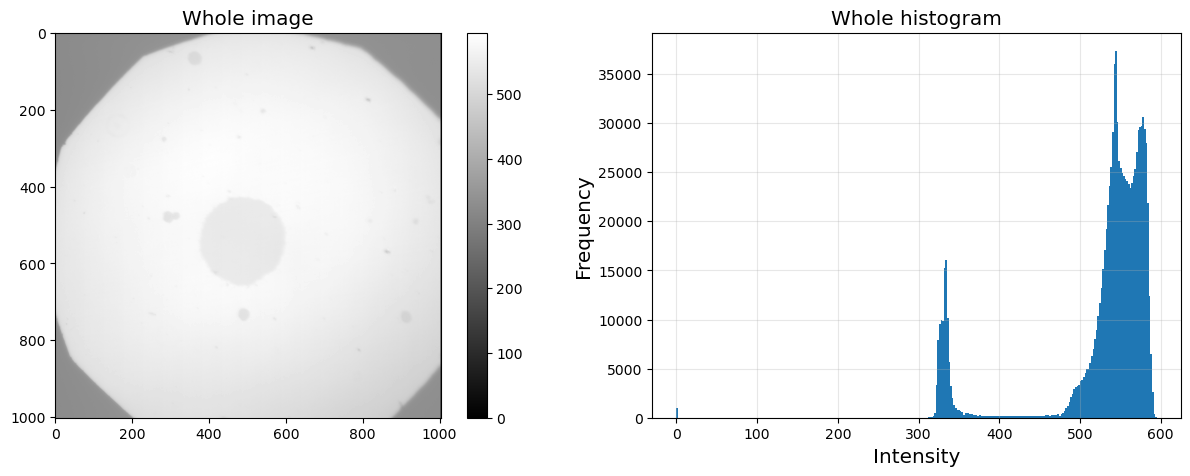

In [2]:
# Read the RICM image
ricm_img = io.imread(f"Data/GUV_SLB_Cadherin.tif")

# display the image and it's histogram
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.imshow(ricm_img, cmap="gray")
#plt.axis('off')
plt.title('Whole image', fontsize='x-large')
plt.colorbar();

plt.subplot(122)
plt.hist(ricm_img.ravel(), bins=300)
plt.title('Whole histogram', fontsize='x-large')
plt.xlabel('Intensity', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
#plt.xlim(300,600)
plt.grid(alpha=0.3);

### Cut the GUV from the RICM image and subtract the base line

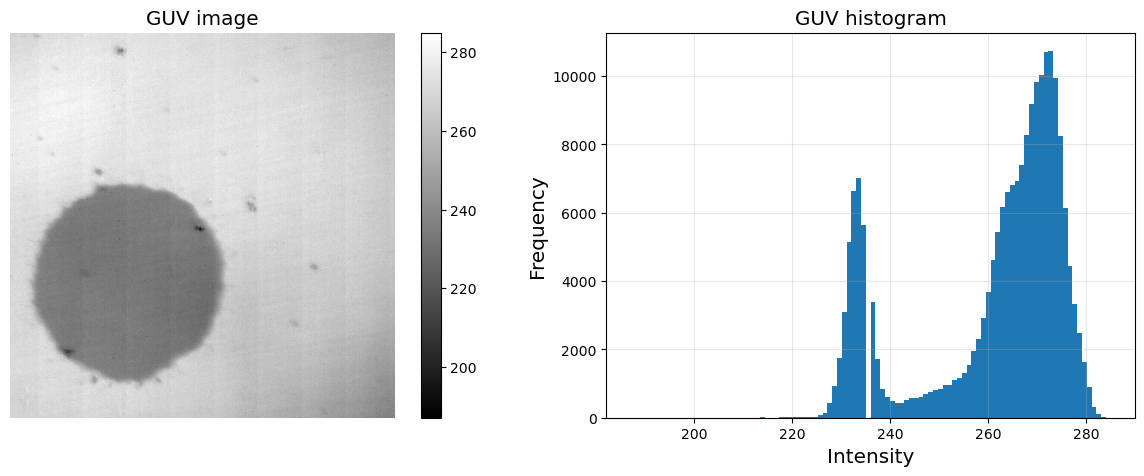

In [3]:
# Cut the GUV from the RICM image
img = ricm_img[250:700, 350:800]

# Subtract the base line
img = img - 310

# display the image and it's histogram
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.title('GUV image', fontsize='x-large')
plt.colorbar();

plt.subplot(122)
plt.hist(img.ravel(), bins = 100)
plt.title('GUV histogram', fontsize='x-large')
plt.xlabel('Intensity', fontsize='x-large')
plt.ylabel('Frequency', fontsize='x-large')
#plt.xlim(0,3000)
plt.grid(alpha=0.3);

### Define the RICM model and show a summary of the steps then fit the model

Y0 = 0.01, A = 0.24, h0 = 32.11


/home/ahmed/Repositories/RICM/RICM_model.py:246: RuntimeWarning: invalid value encountered in arccos
  return (self.l/(4*np.pi*self.n_outer)) * (np.arccos((Y0 - self.background_normalization()) / A) - 2*np.pi*self.p) + h0


Y0 = 0.01, A = 0.24, h0 = 32.11


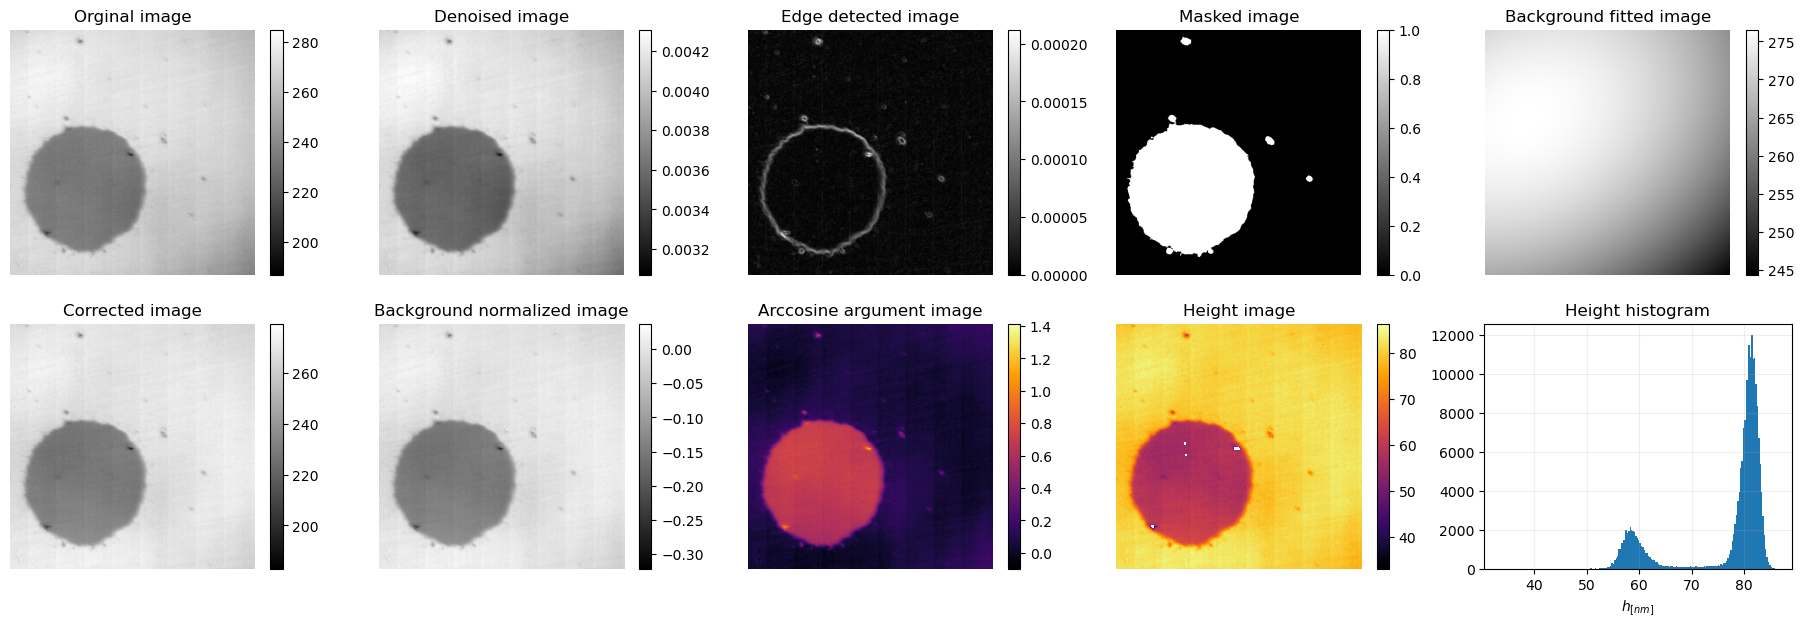

Y0 = 0.01, A = 0.24, h0 = 32.11


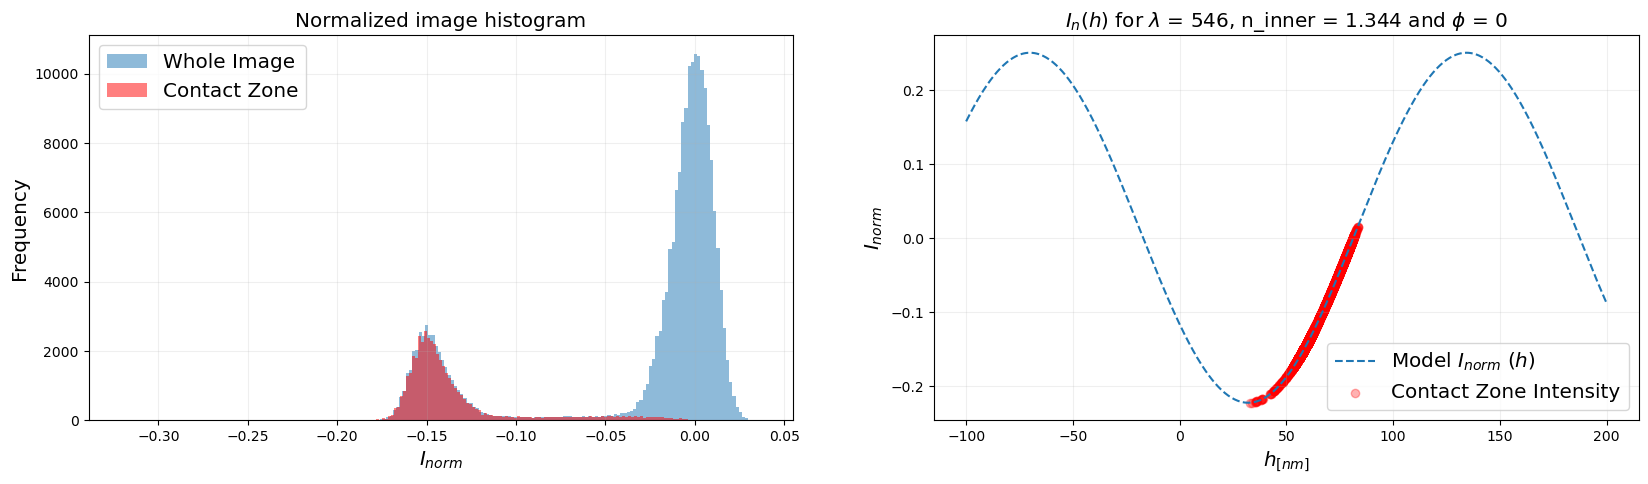

In [4]:
# Define the RICM class with certain n_inner
ricm = RICM(img, n_inner=1.344, p=0, hole=3)

# Display the way to the RICM height mapping step by step
ricm.show_summary(save=True)

# Extract the height on the contact zone
i_height, _ = ricm.model_fitting(h=np.linspace(-100, 200, 600), show=True)

### Fit a gaussian on the signal from the adhesion zone

The height of the GUV is 58.69 nm


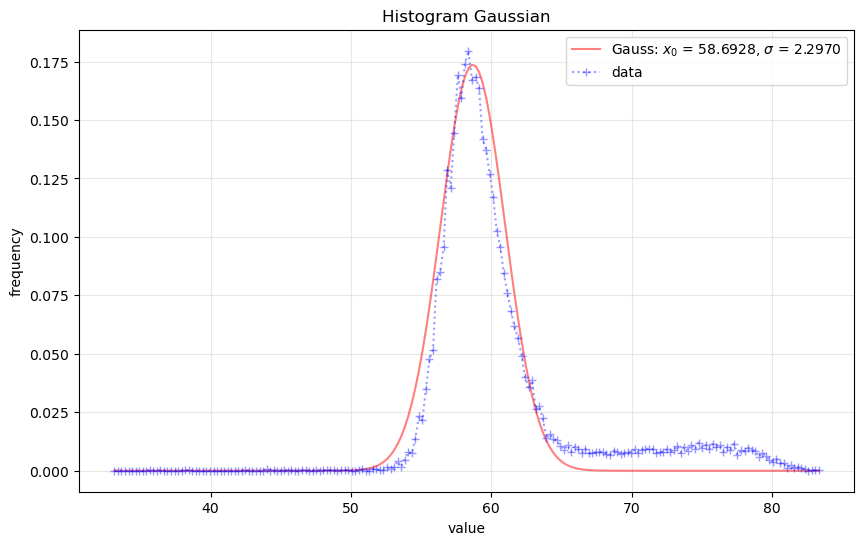

In [5]:
# Fit a gaussian on the adhesion zone histogram
gauss = Fit_Gaussian(i_height, normalized=True)
height, _ = gauss.hist_fitting(show=True)

# Print the height in nano meter
print(f'The height of the GUV is {height:.2f} nm')